### Student Information
Name: 馬禹平

Student ID: 111062611

GitHub ID: vivian1311

Kaggle name: vivian1311

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

# Part I: Take Home Exercise (30%)
Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 

## 1. Data Preparation

In [1]:
# import library
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import gensim
import tensorflow
import keras
%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

2022-11-17 13:20:52.802313: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-17 13:20:52.959012: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-17 13:20:52.959029: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-17 13:20:52.983965: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-17 13:20:53.643907: W tensorflow/stream_executor/platform/de

gensim: 4.2.0
tensorflow: 2.10.0
keras: 2.10.0


### 1.1 Load data

First, to read the origianl files, I use `pd.read_csv` to load the `.csv` file into the dataframes and concatenate them together. 

In [2]:
import pandas as pd

# # training data
# anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
#                          sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
# sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
#                          sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
#                          sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
#                          sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# # combine 4 sub-dataset
# train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

# # testing data
# anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
#                          sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
#                          sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
#                          sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
#                          sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# # combine 4 sub-dataset
# test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

To load the data faster, I save them into the `.pkl` file.

In [3]:
# save to pickle file
# train_df.to_pickle("data/train_df.pkl") 
# test_df.to_pickle("data/test_df.pkl")

In [4]:
## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

Check the loaded data; suffle them and reset the indexs.

In [5]:
train_df.head()

,id,text,emotion,intensity
2448,30444,"@Nekudere oh ok, yeah I felt dumb like I think...",joy,0.479
1865,21008,I'm curious to know just how much money the or...,fear,0.271
1317,20460,"@Relaqss I know she did horrible shit, but it ...",fear,0.542
2411,30407,Watch this amazing live.ly broadcast by @ittzd...,joy,0.483
3423,40596,Some #people already talks about #Halloween \n...,sadness,0.333


In [6]:
test_df.head()

,id,text,emotion,intensity
111,21174,"By officialy adopting #BurhanWani, a #Hizbul t...",fear,0.720
79,10936,@Jen_ny69 People will always get offended ever...,anger,0.562
61,10918,Eat my ass' is no longer an insult,anger,0.438
266,30895,@PhilGlutting Hey There Phil Glutting thank yo...,joy,0.646
66,10923,Taking umbrage because Jimmy Carr claimed that...,anger,0.375


In [7]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
# reset the index
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


### >>> Exercise 1 (Take home):
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [8]:
import nltk

In [9]:
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

train_count_vect = CountVectorizer(max_features = 30)
train_df_counts = train_count_vect.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix

test_count_vect = CountVectorizer(max_features = 30)
test_df_counts = test_count_vect.fit_transform(test_df.text)

In [12]:
# get sorted term frequency
def get_term_freq(counts, count_vect):
    term_freq = np.asarray(counts.sum(axis=0))[0]
    sorted_terms_freq = []

    # get the term-frequency pair to sort
    for x, y in zip(count_vect.get_feature_names_out(), term_freq):
        sorted_terms_freq.append((x, y))

    # sort the frequency
    sorted_terms_freq.sort(key = lambda s: s[1], reverse = True)
    return sorted_terms_freq

In [13]:
train_sorted_terms_freq = get_term_freq(train_df_counts, train_count_vect)
test_sorted_terms_freq = get_term_freq(test_df_counts, test_count_vect)
print(train_sorted_terms_freq)
print(test_sorted_terms_freq)

[('the', 1736), ('to', 1289), ('and', 955), ('you', 796), ('of', 793), ('is', 787), ('it', 717), ('in', 626), ('that', 537), ('my', 535), ('for', 446), ('on', 390), ('be', 383), ('me', 380), ('this', 350), ('so', 328), ('have', 312), ('not', 303), ('just', 301), ('but', 293), ('with', 288), ('at', 269), ('can', 257), ('all', 243), ('like', 243), ('are', 231), ('your', 229), ('was', 228), ('when', 226), ('if', 216)]
[('the', 153), ('to', 138), ('and', 92), ('it', 83), ('of', 83), ('you', 82), ('is', 77), ('in', 69), ('for', 57), ('that', 55), ('my', 52), ('on', 46), ('be', 40), ('me', 36), ('so', 34), ('was', 34), ('can', 32), ('all', 30), ('at', 30), ('have', 30), ('are', 29), ('just', 29), ('with', 29), ('but', 26), ('get', 26), ('like', 24), ('not', 24), ('this', 24), ('up', 24), ('your', 24)]


In [14]:
def plot_term_freq(sorted_term_freq):
    x_plot = np.array([x[0] for x in sorted_term_freq])
    y_plot = np.array([x[1] for x in sorted_term_freq])
    plt.subplots(figsize=(8, 5))
    g = sns.barplot(x = x_plot, y = y_plot)
    g.set_xticklabels(x_plot, rotation = 90);

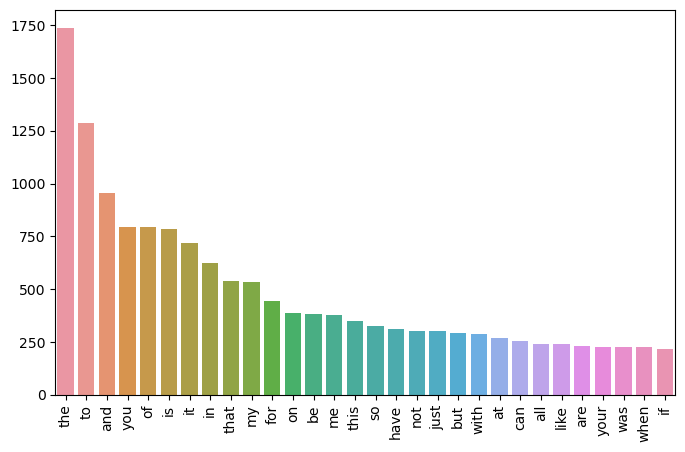

In [15]:
plot_term_freq(train_sorted_terms_freq)

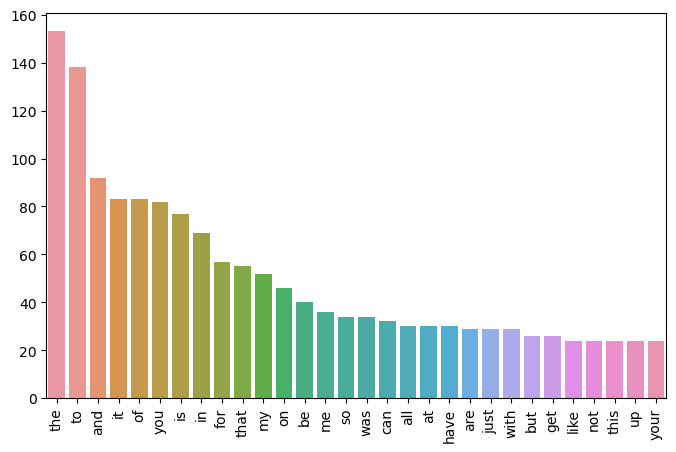

In [16]:
plot_term_freq(test_sorted_terms_freq)

### 1.2 Exploratory data analysis (EDA)

In [17]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

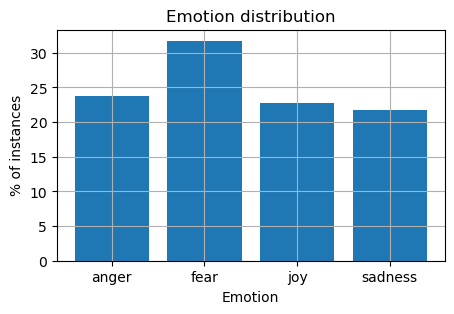

In [18]:
# visualize the distribution
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

# plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

# arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

## 2. Feature engineering

### 2.1 Using Bag of Words
- Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- Set the maximum feature to decrease the effect of **curse of dimensionality**.
- Change the tonkenizing way to **extract the important feature**.
    - some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [19]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features = 500, tokenizer = nltk.word_tokenize) 

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_500.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])
test_data_BOW_features = BOW_500.transform(test_df['text'])

## check dimension
print(train_data_BOW_features_500.shape)
train_data_BOW_features_500.toarray()

/home/vivian212332/miniconda3/envs/tf2/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [21]:
"😂" in feature_names_500

True

### >>> Exercise 2 (Take home):  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_transformer = TfidfVectorizer(max_features = 1000, tokenizer = nltk.word_tokenize)

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
tf_transformer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_TFIDF_features = tf_transformer.transform(train_df['text'])
test_data_TFIDF_features = tf_transformer.transform(test_df['text'])

In [23]:
## check dimension
print(test_data_TFIDF_features.shape)

(347, 1000)


In [24]:
# observe some feature names
TFIDF_feature_names = tf_transformer.get_feature_names_out()
TFIDF_feature_names[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

## 3. Model

### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'anger', 'fear', 'anger', 'joy', 'fear', 'fear', 'anger',
       'sadness', 'anger'], dtype=object)

## 4. Results Evaluation

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

# precision, recall, f1-score
print('classification report:')
print(classification_report(y_true=y_test, y_pred=y_test_pred))

# confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print('confusion matrix:')
print(cm)

training accuracy: 0.99
testing accuracy: 0.66
classification report:
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.66      0.69      0.68       110
         joy       0.70      0.68      0.69        79
     sadness       0.65      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347

confusion matrix:
[[55 20  5  4]
 [16 76  8 10]
 [ 7  8 54 10]
 [ 9 11 10 44]]


In [28]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

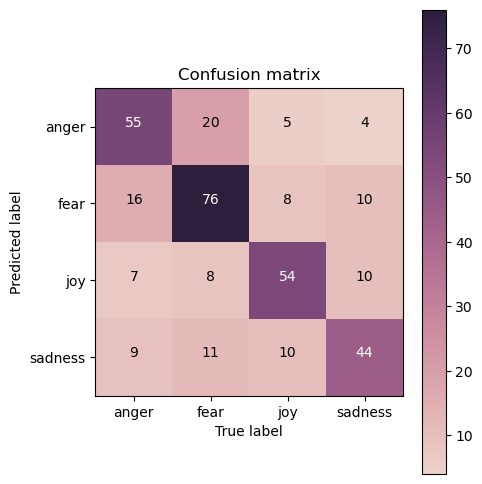

In [29]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [30]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

In [31]:
#group to find distribution
test_df.groupby(['emotion']).count()['text']

emotion
anger       84
fear       110
joy         79
sadness     74
Name: text, dtype: int64

### >>> Exercise 3 (Take home): 
Can you interpret the results above? What do they mean?

**<font color="red">Answer</font>**
1. From the accuracy, we can find that there is a gap between training data and testing data. It may cause by the overfitting of the training process since we don't have a large amount of data.
2. From the confusion matrix, the "fear" class has the better correct guessing. The reason may be because of the larger amount of data that "fear" class has.

### >>> Exercise 4 (Take home): 
Build a model using a Naive Bayes model and train it. What are the testing results?

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [32]:
from sklearn.naive_bayes import MultinomialNB

## build DecisionTree model
NB_model = MultinomialNB()

## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

In [33]:
# accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

# precision, recall, f1-score
print('classification report:')
print(classification_report(y_true=y_test, y_pred=y_test_pred))

# confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print('confusion matrix:')
print(cm)

training accuracy: 0.79
testing accuracy: 0.7
classification report:
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

confusion matrix:
[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


### >>> Exercise 5 (Take home):
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

**<font color="red">Answer</font>**
1. Decision Tree has the higher training accuracy. Since Naive Bayes is a simpler linear classification model, it may lead to lower accuracy. 
2. Decision Tree has the lower testing accuracy. We already mention that Decision Tree has the over fitting problem in Exercise 3. Further, Decision Tree uses the greedy algorithm to build the tree based on the training data, which may not suitalbe for the testing data.

## 5. Deep Learning

### 5.1 Prepare data (X, y)

In [34]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 5.2 Deal with categorical label (y)
Process `train_df['emotion']` categorical using one-hot encoding to transform our categorical labels to numerical ones.

In [35]:
# deal with label into one hot
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('\033[36mlabels:', label_encoder.classes_)
print('\033[36mBefore convert:\033[0m')
print('y_train[0:4]:\n', y_train[0:4])
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\033[36mAfter convert:\033[0m')
print('y_train[0:4]:\n', y_train[0:4])
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


labels: ['anger' 'fear' 'joy' 'sadness']
Before convert:
y_train[0:4]:
 0    sadness
1    sadness
2        joy
3       fear
Name: emotion, dtype: object
y_train.shape:  (3613,)
y_test.shape:  (347,)
After convert:
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 5.3 Build model

In [36]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [37]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

2022-11-17 13:20:58.357920: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 13:20:58.358064: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-17 13:20:58.358115: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-11-17 13:20:58.358154: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-11-17 13:20:58.358190: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

### 5.4 Train

In [38]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/home/vivian212332/miniconda3/envs/tf2/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 1s 2ms/step - loss: 1.3332 - accuracy: 0.3604 - val_loss: 1.2867 - val_accuracy: 0.4467
Epoch 2/25
113/113 [==============================] - 0s 1ms/step - loss: 0.9947 - accuracy: 0.6424 - val_loss: 0.9087 - val_accuracy: 0.6801
Epoch 3/25
113/113 [==============================] - 0s 992us/step - loss: 0.5912 - accuracy: 0.7888 - val_loss: 0.7692 - val_accuracy: 0.7061
Epoch 4/25
113/113 [==============================] - 0s 1ms/step - loss: 0.4130 - accuracy: 0.8469 - val_loss: 0.7784 - val_accuracy: 0.7061
Epoch 5/25
113/113 [==============================] - 0s 993us/step - loss: 0.3342 - accuracy: 0.8782 - val_loss: 0.7979 - val_accuracy: 0.7176
Epoch 6/25
113/113 [==============================] - 0s 999us/step - loss: 0.2629 - accuracy: 0.9070 - val_loss: 0.8717 - val_accuracy: 0.7089
Epoch 7/25
113/113 [==============================] - 0s 994us/step - loss: 0.2159 - accuracy: 0.9255 - val_loss: 0.9393 - val_accuracy: 0.6830
Epoch 8/2

### 5.5 Predict on testing data

In [39]:
# predict
pred_result = model.predict(X_test, batch_size=128)
print(pred_result[:5])
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

3/3 [==============================] - 0s 2ms/step
[[9.9886835e-01 1.2086082e-05 1.2467790e-06 1.1181984e-03]
 [9.1159379e-01 5.3913598e-03 1.3821566e-03 8.1632674e-02]
 [1.7341729e-03 7.5660586e-01 2.2909494e-01 1.2564973e-02]
 [9.7510391e-01 1.6997615e-06 2.7108322e-07 2.4894167e-02]
 [2.5591617e-03 3.0913294e-04 9.9711007e-01 2.1465692e-05]]


array(['anger', 'anger', 'fear', 'anger', 'joy'], dtype=object)

In [40]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))
training_log = pd.read_csv("logs/training_log.csv")
training_log

testing accuracy: 0.66


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.360365,1.333202,0.446686,1.286702
1,1,0.642402,0.994662,0.680115,0.908744
2,2,0.788818,0.591236,0.706052,0.769163
3,3,0.846942,0.413028,0.706052,0.778363
4,4,0.878218,0.334226,0.717579,0.797949
5,5,0.907003,0.262854,0.708934,0.871691
6,6,0.925547,0.215933,0.682997,0.939257
7,7,0.939109,0.184804,0.688761,0.966102
8,8,0.949073,0.155824,0.680115,1.065661
9,9,0.958206,0.134297,0.685879,1.096677


### >>> Exercise 6 (Take home):

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

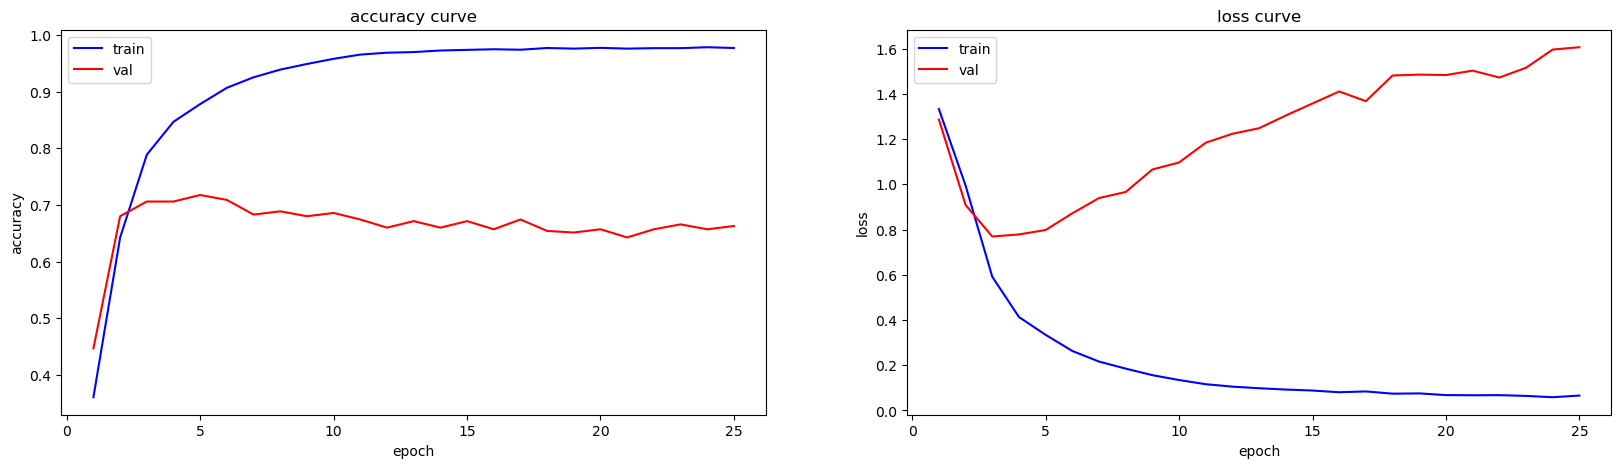

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 5))

# plot the accuracy curve
plt.subplot(121)
x = np.arange(len(training_log.accuracy)) + 1
train, = plt.plot(x, training_log.accuracy, 'b')
val, = plt.plot(x, training_log.val_accuracy, 'r')
plt.title('accuracy curve')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(handles = [train, val], labels = ['train', 'val'], loc = 'best')

# plot the loss curve
plt.subplot(122)
x = np.arange(len(training_log.loss)) + 1
train, = plt.plot(x, training_log.loss, 'b')
val, = plt.plot(x, training_log.val_loss, 'r')
plt.title('loss curve')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(handles = [train, val], labels = ['train', 'val'], loc = 'best')
plt.show()

**<font color="red">Answer</font>**
1. In the first few epochs (< 5 epochs), we can observe that the accuracy of the validation set grows up rapidly. Here is the underfitting part.
2. After the 3-5 epochs, for the validation set, the accuracy curve becomes gentle and the loss curve grows up. This is the sign of overfitting, which may cause by over training.
3. When the accuracy curve goes up, the loss curve goes down.

## 6. Word2Vector

### 6.1 Prepare training corpus

In [42]:
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
0,40562,AQW should've always stayed in the 08 art styl...,"[AQW, should, 've, always, stayed, in, the, 08..."
1,40111,@megalvz literally was gloomy for an hour,"[@, megalvz, literally, was, gloomy, for, an, ..."
2,30454,Optimism leads to success. - Bill Kerr @Coach_...,"[Optimism, leads, to, success, ., -, Bill, Ker..."
3,20710,my alarm clock was ringing this morning n my f...,"[my, alarm, clock, was, ringing, this, morning..."
4,40560,@LacesUntied_ yea lol catchy you fret,"[@, LacesUntied_, yea, lol, catchy, you, fret]"


In [43]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
for s in training_corpus[:5]:
    print(s)

['AQW', 'should', "'ve", 'always', 'stayed', 'in', 'the', '08', 'art', 'style', ',', 'now', 'it', "'s", 'just', 'a', 'competition', 'to', 'create', 'more', 'detailed', 'art', 'each', 'time', '.']
['@', 'megalvz', 'literally', 'was', 'gloomy', 'for', 'an', 'hour']
['Optimism', 'leads', 'to', 'success', '.', '-', 'Bill', 'Kerr', '@', 'Coach__Kerr', '#', 'success', '#', 'optimism', '#', 'goals']
['my', 'alarm', 'clock', 'was', 'ringing', 'this', 'morning', 'n', 'my', 'flatmate', 'knocked', 'on', 'my', 'door', 'and', 'asked', 'if', 'i', 'set', 'anything', 'on', 'fire', 'or', 'if', 'i', "'m", 'burning', 'alive', ':', ')', ':', ')', ':', ')']
['@', 'LacesUntied_', 'yea', 'lol', 'catchy', 'you', 'fret']


### 6.2 Train the Word2Vec Model

In [44]:
from gensim.models import Word2Vec

# setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

# model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

### 6.3 Generate the embedding

In [45]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
print(word_vec.shape)                  # the shape should equal to the vector_dim
word_vec

(100,)


array([ 4.52516526e-01,  1.73940465e-01, -2.68692255e-01,  1.28806550e-02,
        3.20863366e-01, -1.28938365e+00,  8.70136142e-01,  1.63084602e+00,
       -3.30268830e-01, -4.84390527e-01, -4.25873786e-01, -4.45952207e-01,
       -4.95464295e-01,  2.72545189e-01, -2.34717876e-01, -2.52904981e-01,
        5.31975985e-01, -3.24659437e-01,  8.37655544e-01, -1.36155653e+00,
        3.46046776e-01,  6.37510836e-01,  7.76454926e-01,  3.20479199e-02,
       -3.77156064e-02,  2.32862517e-01, -4.81594622e-01,  3.29840511e-01,
       -1.98628053e-01,  4.08156961e-01,  2.44387805e-01, -4.04733568e-02,
        6.93963468e-01, -8.32377970e-01, -8.55865330e-02,  5.40303648e-01,
       -1.33524597e-01, -3.19531024e-01, -1.01675436e-01, -6.56676471e-01,
        1.08299255e-01,  1.32840544e-01, -1.89403728e-01,  4.83538747e-01,
        6.91832066e-01, -6.81589320e-02, -6.26241446e-01, -1.50316387e-01,
        7.49568999e-01,  2.88105190e-01, -1.91103384e-01, -3.04719508e-01,
        1.09367155e-01, -

In [46]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9333710074424744),
 ('Be', 0.9208347201347351),
 ('nuclear', 0.9166560769081116),
 ('forever', 0.9057925343513489),
 ('help', 0.9042537808418274),
 ("'you", 0.9014079570770264),
 ('shudder', 0.8960634469985962),
 ('smile', 0.8960587978363037),
 ('missiles.\\n\\n', 0.8951224088668823),
 ('establishment', 0.894658088684082)]

### 6.4 Load the pre-trained w2v model

In [47]:
# download the model
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

In [48]:
# king + woman - man =
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674735069275),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

### >>> Exercise 7 (Take home): 

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

**<font color="red">Answer</font>**
1. Concatenate the words in a sentences together as the input of deep learning model
2. Average or weighted the word vectors in the sentence as the vector of the sentence
3. Use doc2vec to represent the text

Here I tried to average the word vectors to represent the sentence. While we can find that the result is bad. The reason may because that there are different kinds of words in a sentence, so the average vector can't represent significant meaning.

In [49]:
model_words = set(w2v_google_model.index_to_key)

In [50]:
test_df['text_tokenized'] = test_df['text'].apply(lambda x: nltk.word_tokenize(x))

In [51]:
X_train = np.array([np.array([w2v_google_model[i] for i in ls if i in model_words])
                         for ls in train_df['text_tokenized']])
y_train = train_df['emotion']
X_test = np.array([np.array([w2v_google_model[i] for i in ls if i in model_words])
                         for ls in test_df['text_tokenized']])
y_test = test_df['emotion']

In [52]:
# Average the word vectors for each sentence (and assign a vector of zeros if the model
# did not learn any of the words in the text message during training
X_train_avg = []
for v in X_train:
    if v.size:
        X_train_avg.append(v.mean(axis=0))
    else:
        X_train_avg.append(np.zeros(100, dtype=float))
        
X_test_avg = []
for v in X_test:
    if v.size:
        X_test_avg.append(v.mean(axis=0))
    else:
        X_test_avg.append(np.zeros(100, dtype=float))

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

## training!
rf = rf.fit(X_train_avg, y_train)

## predict!
y_train_pred = rf.predict(X_train_avg)
y_test_pred = rf.predict(X_test_avg)

## so we get the pred result
y_test_pred[:3]

array(['anger', 'anger', 'fear'], dtype=object)

In [54]:
# accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

# precision, recall, f1-score
print('classification report:')
print(classification_report(y_true=y_test, y_pred=y_test_pred))

# confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print('confusion matrix:')
print(cm)

training accuracy: 0.99
testing accuracy: 0.56
classification report:
              precision    recall  f1-score   support

       anger       0.60      0.48      0.53        84
        fear       0.50      0.78      0.61       110
         joy       0.64      0.52      0.57        79
     sadness       0.59      0.35      0.44        74

    accuracy                           0.56       347
   macro avg       0.58      0.53      0.54       347
weighted avg       0.57      0.56      0.55       347

confusion matrix:
[[40 31  7  6]
 [12 86  5  7]
 [ 9 24 41  5]
 [ 6 31 11 26]]


## 7. Clustering: k-means
Here we introduce how to use sklearn to do the basic unsupervised learning approach, k-means.

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [55]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [56]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


In [57]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [58]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

## 8. High-dimension Visualization: t-SNE

### 8.1 Prepare visualizing target

In [59]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 8.2 Plot using t-SNE (2-dimension)

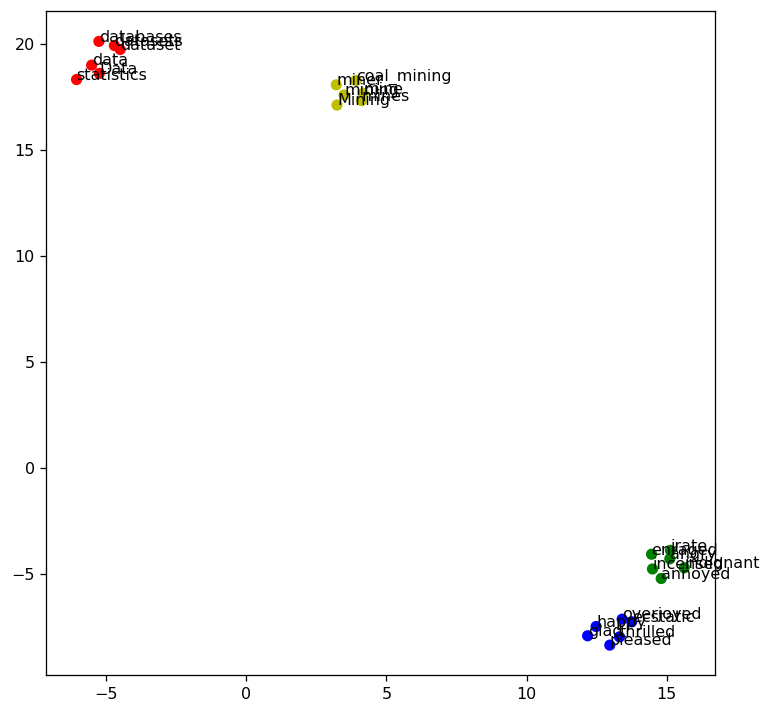

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### >>> Exercise 8 (Take home):
Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [61]:
# set top 15 related words
topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = angry_words + happy_words + sad_words + fear_words

# set the color
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

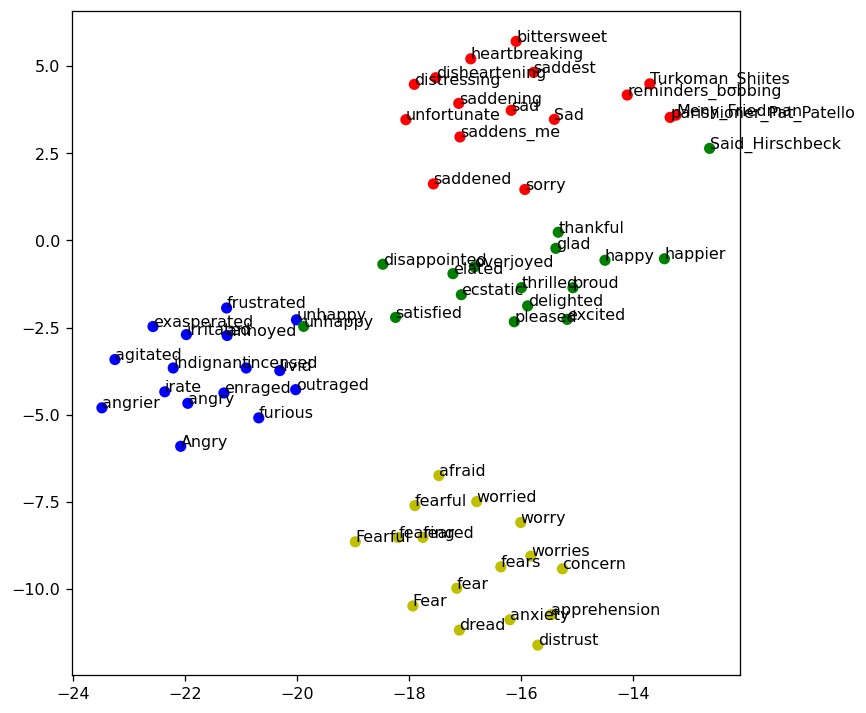

In [62]:
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()